In [6]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('pondy2000-2020.csv',parse_dates=[['YEAR','MO','DY']])#parsing_dates with 'YEAR','MO','DY'
df.head()

,YEAR_MO_DY,LAT,LON,T2M_RANGE,TS,T2M_MAX,T2M_MIN,WS50M_RANGE,WS50M_MIN,WS50M_MAX,WS50M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,KT,PRECTOT,QV2M,PS,T2M
0,2000-01-01,11.88101,79.75921,5.74,24.44,27.40,21.65,2.09,6.23,8.33,7.24,4.57,3.70,0.44,0.09,14.21,100.77,24.07
1,2000-01-02,11.88101,79.75921,6.18,24.64,27.73,21.56,2.24,6.06,8.30,7.18,5.17,5.14,0.61,0.08,13.89,100.74,24.38
2,2000-01-03,11.88101,79.75921,5.28,24.75,27.33,22.06,2.18,6.14,8.32,7.46,5.77,3.35,0.40,0.03,14.58,100.67,24.27
3,2000-01-04,11.88101,79.75921,6.08,24.86,27.48,21.40,2.54,5.91,8.45,7.00,5.34,5.17,0.61,0.03,14.99,100.66,24.21
4,2000-01-05,11.88101,79.75921,4.68,25.34,27.68,23.00,3.11,6.35,9.46,7.63,5.41,3.22,0.38,0.86,16.59,100.61,24.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 18 columns):
YEAR_MO_DY           7305 non-null datetime64[ns]
LAT                  7305 non-null float64
LON                  7305 non-null float64
T2M_RANGE            7305 non-null float64
TS                   7305 non-null float64
T2M_MAX              7305 non-null float64
T2M_MIN              7305 non-null float64
WS50M_RANGE          7305 non-null float64
WS50M_MIN            7305 non-null float64
WS50M_MAX            7305 non-null float64
WS50M                7305 non-null float64
CLRSKY_SFC_SW_DWN    7305 non-null float64
ALLSKY_SFC_SW_DWN    7305 non-null float64
KT                   7305 non-null float64
PRECTOT              7305 non-null float64
QV2M                 7305 non-null float64
PS                   7305 non-null float64
T2M                  7305 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 1.0 MB


In [4]:
df.rename(columns={'KT':'ICI','WS50M':'wind_speed','WS50M_RANGE':'wind_speed_range','TS':'skin_temperature','CLRSKY_SFC_SW_DWN':'CSII',
                   'T2M_RANGE':'temp_range','WS50M_MAX':'max_wind_speed','WS50M_MIN':'min_wind_speed',
                   'T2M_MAX':'max_temp','QV2M':'humidity','ALLSKY_SFC_SW_DWN':'SII','PRECTOT':'Precepitation',
                   'PS':'surface_pressure','T2M':'temperature','T2M_MIN':'min_temp'},inplace=True)

In [5]:
df.set_index('YEAR_MO_DY',inplace=True)#setting 'YEAR_MO_DY' as index columns

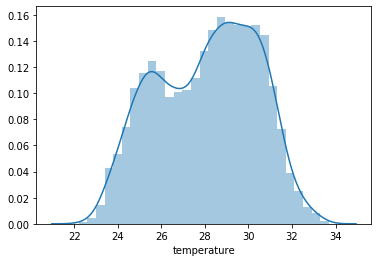

In [7]:
sns.distplot(df['temperature'])

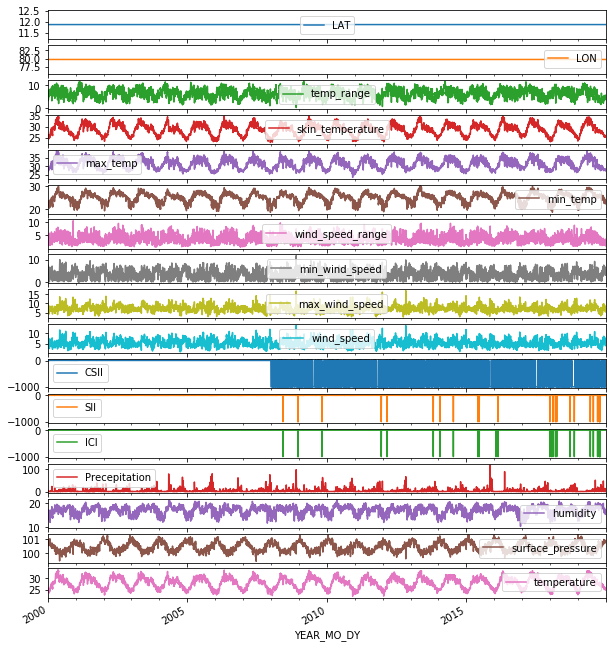

In [8]:
df.plot(subplots=True,figsize=(10,12))
plt.legend(loc='upper right')
plt.show()

In [9]:
#Extracting temperature data with monthly average from 'df' dataframe
df1=df[['temperature']].resample('M').mean()
df1

,temperature
YEAR_MO_DY,
2000-01-31,24.785161
2000-02-29,26.615517
2000-03-31,27.671935
2000-04-30,30.404000
2000-05-31,31.184839
...,...
2019-08-31,29.019677
2019-09-30,28.078000
2019-10-31,27.292258


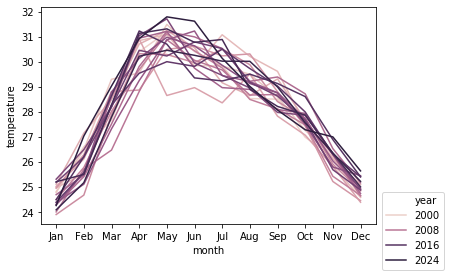

In [11]:
plt.plot(figsize=(30,19))
sns.lineplot(df1['month'],df1['temperature'],hue=df1['year'],sort=False,ci=None)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

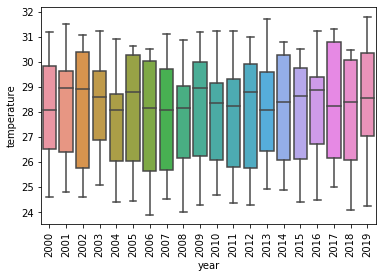

In [12]:
sns.boxplot(x='year', y='temperature', data=df1)#
plt.xticks(rotation=90)
plt.show()

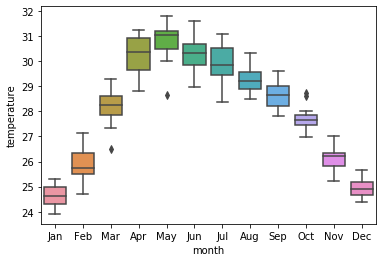

In [13]:
sns.boxplot(x='month',y='temperature',data=df1)

**Decomposing time series**

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

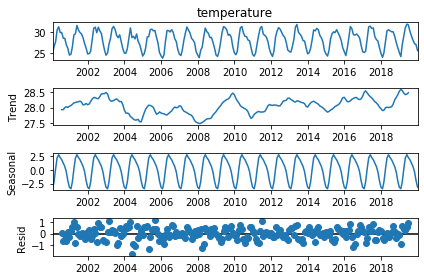

In [15]:
result_add=seasonal_decompose(x=df1['temperature'],model='additive')
result_add.plot()
plt.show()

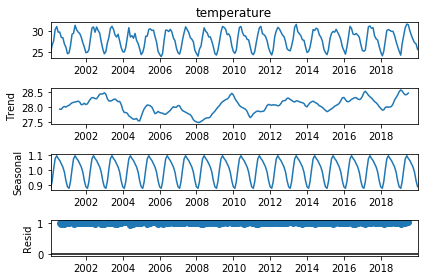

In [16]:
result_mul=seasonal_decompose(x=df1['temperature'],model='multiplicative')
result_mul.plot()
plt.show()

**Checking for stationarity**

In [17]:
from statsmodels.tsa.stattools import adfuller, kpss

In [18]:
result_ad=adfuller(df1['temperature'])
print('p-value:',result_ad[1])

p-value: 0.016305502883376018


p-values<0.05,Hence the time series is stationary

In [19]:
result_kpss=kpss(df1['temperature'])
print('p-value:',result_kpss[1])

p-value: 0.1


C:\Users\SURENDAR\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\SURENDAR\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


p-value >0.05 ,Hence the time series is trend stationary

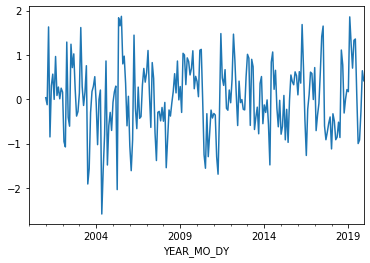

In [20]:
df1['seasonal_diff']=df1['temperature']-df1['temperature'].shift(12)
df1['seasonal_diff'].plot()

In [21]:
result=adfuller(df1['seasonal_diff'].dropna())
result[1]

6.901743543452233e-06

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

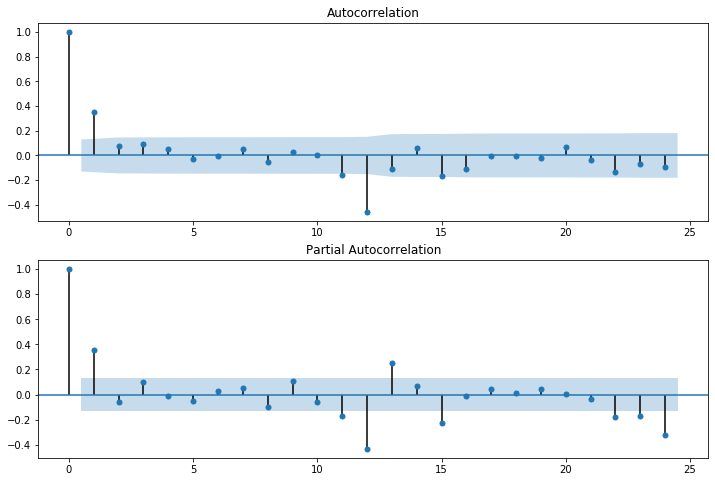

In [23]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['seasonal_diff'].iloc[13:],ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['seasonal_diff'].iloc[13:],ax=ax2)

In [24]:
import statsmodels.api as sm

**Since it is a seasonal timeseries,let's use SARIMAX**

In [25]:
model=sm.tsa.statespace.SARIMAX(df1['temperature'],order=(1,0,0),seasonal_order=(0,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          temperature   No. Observations:                  240
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -198.891
Date:                              Sun, 20 Jun 2021   AIC                            403.783
Time:                                      12:32:35   BIC                            414.071
Sample:                                  01-31-2000   HQIC                           407.934
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3776      0.065      5.821      0.000       0.250       0.505
ma.S.L12      -0.9491      0.134     -7.075      0.000      -1.212      -0.686
sigma2         0.2986      0.040      7.494      0.000       0.221       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                49.89
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.64
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

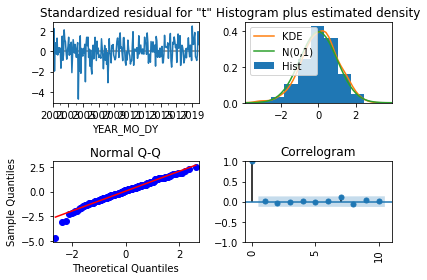

In [26]:
results.plot_diagnostics()
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

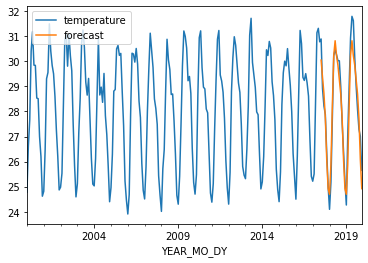

In [27]:
df1['forecast']=results.predict(start=210,end=240,dynamic=True)
df1[['temperature','forecast']].plot()

hence,we have a forecast which is not bad.

In [28]:
fu_index= pd.period_range('2020-01-31', periods=24, freq='M')

**Forecast for next three years**

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,36)]
future_dates[0:4]

[Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2020-03-31 00:00:00')]

In [30]:
 #pd.to_datetime('2018-01-03')+DateOffset(months=1)

In [31]:
forecast_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [32]:
forecast_df.tail(20)

,temperature,year,month,seasonal_diff,forecast
2021-04-30,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN,NaN
2021-10-31,NaN,NaN,NaN,NaN,NaN
2021-11-30,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-31,NaN,NaN,NaN,NaN,NaN


In [33]:
new_df=pd.concat([df1,forecast_df])
new_df.tail()

,temperature,year,month,seasonal_diff,forecast
2022-07-31,NaN,NaN,NaN,NaN,NaN
2022-08-31,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN,NaN,NaN
2022-11-30,NaN,NaN,NaN,NaN,NaN


In [34]:
new_df.shape

(275, 5)

In [35]:
df1.shape

(240, 5)

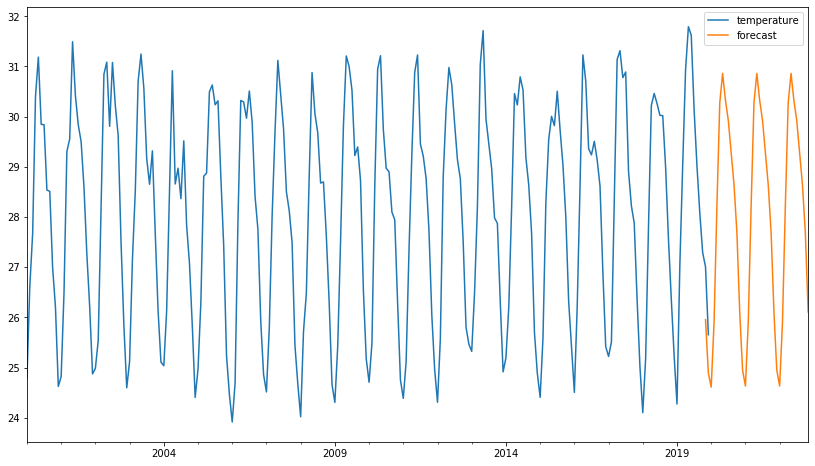

In [36]:
new_df['forecast']=results.predict(start=238,end=274,dynamic=True)
new_df[['temperature','forecast']].plot(figsize=(14,8))
plt.show()

In [37]:
new_df['forecast'].tail(5)

2022-07-31    29.922798
2022-08-31    29.282076
2022-09-30    28.643583
2022-10-31    27.701289
2022-11-30    26.106149
Name: forecast, dtype: float64

In [38]:
new_df.shape,df1.shape

((275, 5), (240, 5))

In [39]:
predicted=new_df['forecast'].dropna()
predicted=predicted[2:]
predicted.tail(5)

2022-07-31    29.922798
2022-08-31    29.282076
2022-09-30    28.643583
2022-10-31    27.701289
2022-11-30    26.106149
Name: forecast, dtype: float64

## Evaluating Prediction

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
y_train=df1.loc['2017-01-31':'2019-11-30','temperature']

In [42]:
mse=mean_squared_error(y_train,predicted)

In [43]:
np.sqrt(mse)

0.573352701575383

In [44]:
r2_score(y_train,predicted)

0.9350965051039399

## Finding best parameters

In [46]:
import pmdarima as pm

In [47]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df1['temperature'], start_p=0, start_q=0,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=7.13 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=551.412, Time=0.36 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=462.118, Time=3.01 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.91 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=549.713, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=523.070, Time=0.24 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=434.824, Time=12.27 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=69.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=457.389, Time=14.01 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=436.732, Time=10.69 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=436.732, Time=18.19 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=436.295, Time=11.61 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=438.732, Time=42.01 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -212.503
Date:                            Sun, 20 Jun 2021   AIC                            433.005
Time:                                    12:37:10   BIC                            446.722
Sample:                                         0   HQIC                           438.540
                                            - 240                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3260      0.069      4.708      0.000       0.190       0.462
ar.S.L12      -0.6878      0.067    -10.223      0.000      -0.820      -0.556
ar.S.L24      -0.3716      0.061     -6.081      0.000      -0.491      -0.252
sigma2         0.3660      0.025     14.392      0.000       0.316       0.416
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                67.61
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.67
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 ARIMA(1,0,0)(2,1,0)[12] has the lowest AIC value,hence it is the best parameter set for this data.